# Download CSV data from this link: 
https://github.com/jcpeterson/omi/blob/main/attribute_means.csv

In [2]:
!pip install numpy
!pip install scikit-learn 
!pip install matplotlib

DEPRECATION: pytorch-lightning 1.5.6 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.6 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e7/e3/c82963a3b86d6e6d5874cbeaa390166458a7f1961bab9feb14d3d1a10f02/matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

#load csv data
# Read the data (skip header)
data = np.genfromtxt('attribute_means.csv', delimiter=',', skip_header=1)

# Read the header separately
with open('attribute_means.csv', 'r') as f:
    header = f.readline().strip().split(',')

# Print the name of column 5
print("Name of column 2:", header[5])



Name of column 2: age


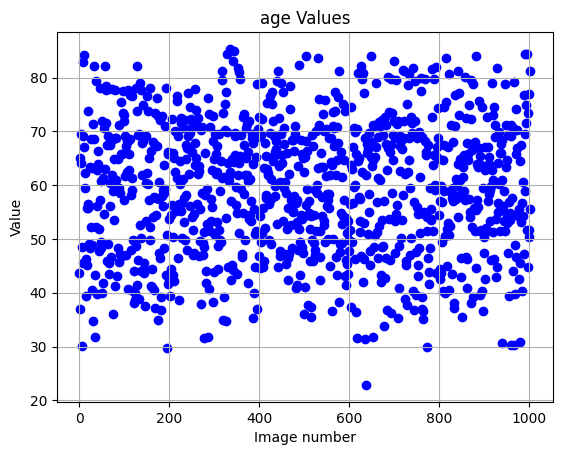

In [26]:
# Plot only column 1 (second column, index 1)
plt.scatter(range(len(data)), data[:, 1], c='blue', marker='o')
#plt.plot(data[:, 1])  # all rows, column at index 1
plt.title(f'{header[5]} Values')
plt.xlabel('Image number')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [27]:

# Use only one feature column (e.g., column 5)
X = data[:, [5]]  # Make sure it's 2D: shape (n_samples, 1)

# Labels from column 1
y = np.where(X[:, 0] > 50, 1, -1)
#y = np.where(X > 50, 1, -1)



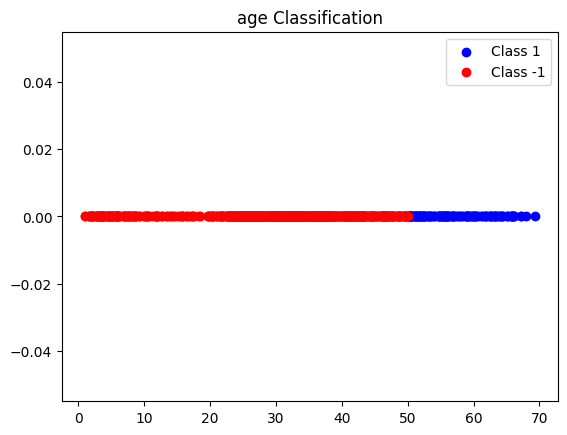

In [19]:
#plot the data 
plt.scatter(X[y==1, 0], [0]*np.sum(y==1), c='b', label= 'Class 1')
plt.scatter(X[y==-1, 0], [0]*np.sum(y==-1), c='r', label= 'Class -1')
plt.legend()
plt.title(f'{header[5]} Classification')
plt.show()

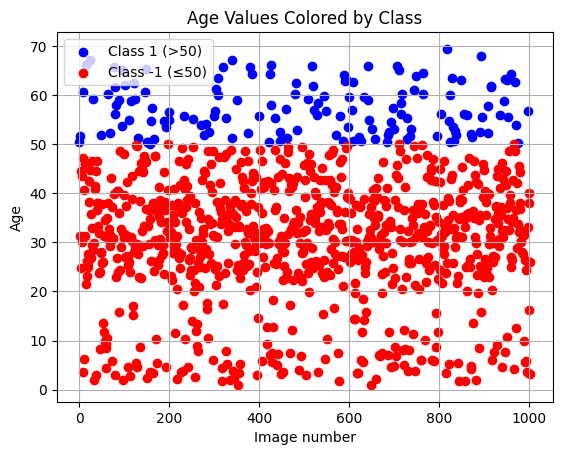

In [28]:
# Create x-axis as row indices
row_indices = np.arange(len(X))

# Plot age values colored by class
plt.scatter(row_indices[y == 1], X[y == 1, 0], c='b', marker='o', label='Class 1 (>50)')
plt.scatter(row_indices[y == -1], X[y == -1, 0], c='r', marker='o', label='Class -1 (≤50)')

plt.title('Age Values Colored by Class')
plt.xlabel('Image number')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report 

#split to training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create classifier 
svm_classifier = SVC(kernel='linear', random_state=42) #'linear', 'rbf', 'poly'

#train 
svm_classifier.fit(X_train, y_train)

#test 
y_pred = svm_classifier.predict(X_test)
print(y_pred)

#evaluate 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        27

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



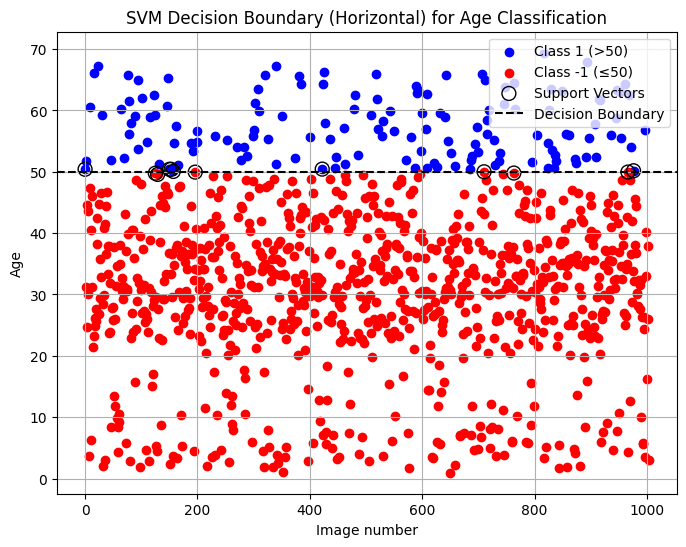

In [30]:


plt.figure(figsize=(8, 6))

row_indices = np.arange(len(X))

# Plot the points: x = row index, y = age value
plt.scatter(row_indices[y == 1], X[y == 1, 0], c='b', marker='o', label='Class 1 (>50)')
plt.scatter(row_indices[y == -1], X[y == -1, 0], c='r', marker='o', label='Class -1 (≤50)')

# Plot support vectors: their age values on y, row indices on x
support_indices = []  # To find row indices of support vectors
for sv in svm_classifier.support_vectors_:
    # Find closest match in X to get row index
    idx = np.argmin(np.abs(X[:, 0] - sv[0]))
    support_indices.append(idx)

plt.scatter(support_indices, svm_classifier.support_vectors_[:, 0],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot horizontal decision boundary (age threshold)
w = svm_classifier.coef_[0][0]
b = svm_classifier.intercept_[0]

# The decision boundary corresponds to w*x + b = 0 → x = -b/w
# Here, x is age, which we plot on y-axis, so plot horizontal line at this age:
decision_boundary = -b / w

plt.axhline(y=decision_boundary, color='k', linestyle='--', label='Decision Boundary')

plt.xlabel('Image number')
plt.ylabel('Age')
plt.title('SVM Decision Boundary (Horizontal) for Age Classification')
plt.legend()
plt.grid(True)
plt.show()
